In [1]:
from survae.data import *
from survae.layer import *
from survae.plot import *
from survae.train import *

In [2]:
model_generators = [
    lambda: SurVAE(
        [
            BijectiveLayer(2, [64] * 5), OrthonormalLayer(2),
            BijectiveLayer(2, [64] * 5), OrthonormalLayer(2),
            BijectiveLayer(2, [64] * 5), OrthonormalLayer(2),
            BijectiveLayer(2, [64] * 5),
        ],
        name="NF",
    ),
    lambda: SurVAE(
        [
            Augment(2, 4),
            BijectiveLayer(4, [64] * 5), OrthonormalLayer(4),
            BijectiveLayer(4, [64] * 5), OrthonormalLayer(4),
            BijectiveLayer(4, [64] * 5), OrthonormalLayer(4),
            BijectiveLayer(4, [64] * 5),
        ],
        name="NF-augmented",
    ),
    lambda: SurVAE(
        [
            Augment(2, 4),
            BijectiveLayer(4, [64] * 5), OrthonormalLayer(4),
            BijectiveLayer(4, [64] * 5),
            AbsoluteUnit(torch.tensor([0.5] * 4)),
            BijectiveLayer(4, [64] * 5), OrthonormalLayer(4),
            BijectiveLayer(4, [64] * 5),
        ],
        name="NF-augmented-abs",
    ),
]

In [3]:
datasets = [Moons(), Spiral(), Ngon(), SplitLine()]

In [4]:
models = train_models(model_generators, datasets, epochs=10_000)

 75%|███████▌  | 9/12 [50:05<16:36, 332.28s/it]  /home/xiaoxiae/Documents/Education/School/Heidelberg/Studium/Magisterské/3. semestr/Generative Neural Networks for the Sciences (ML)/final/survae/data.py:456: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal(mu, sigma, n)
100%|██████████| 12/12 [1:05:14<00:00, 326.20s/it]


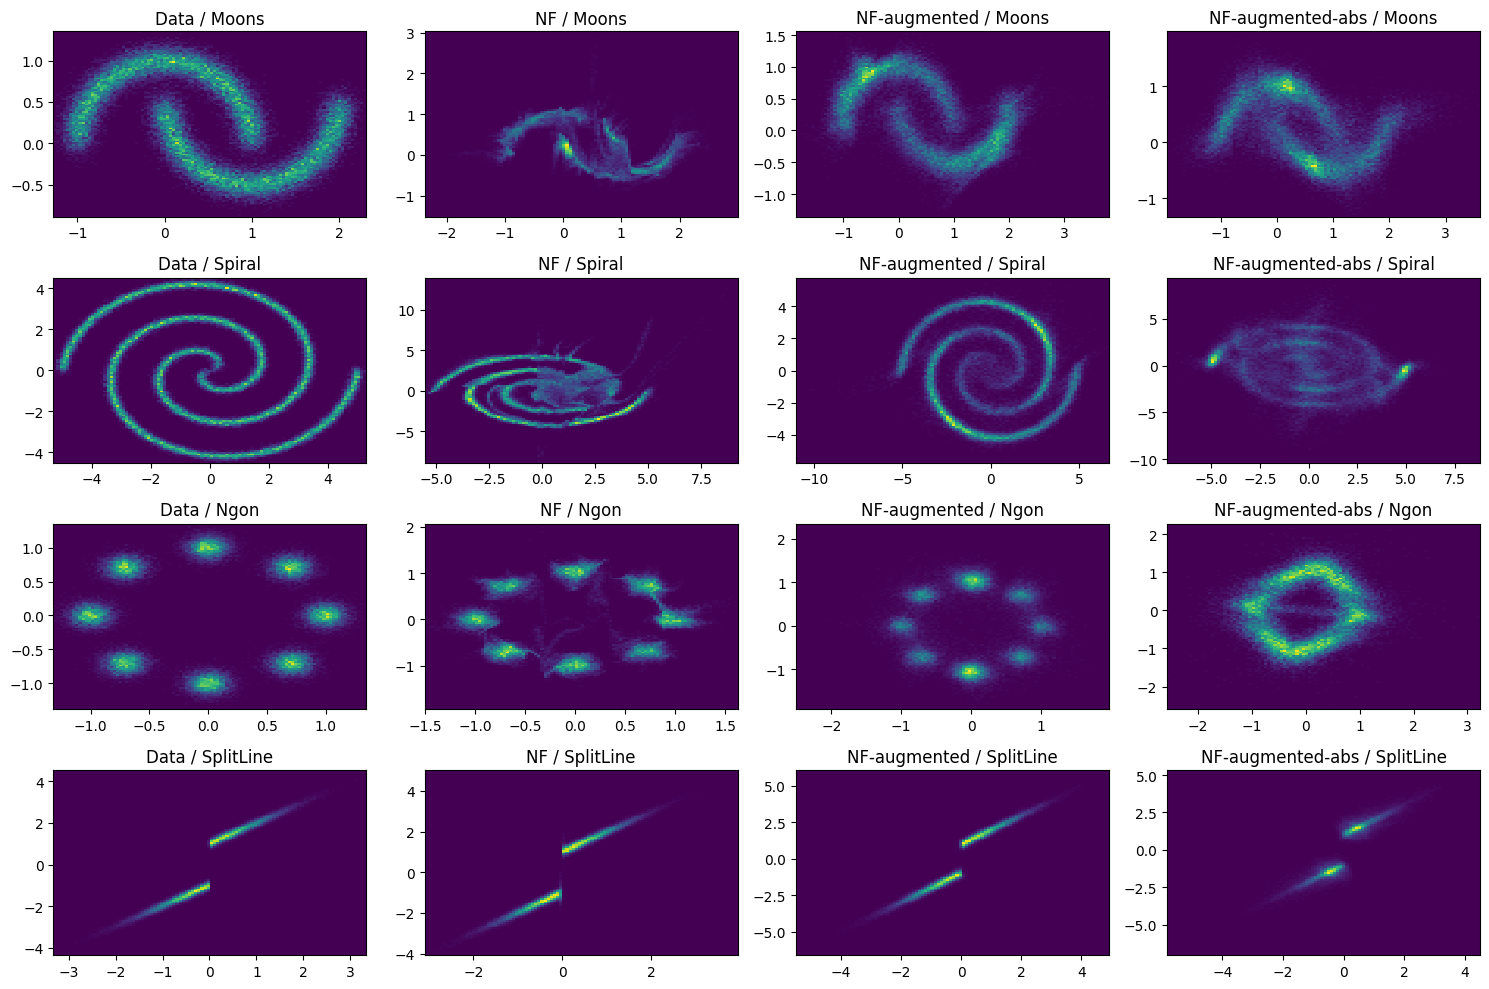

In [5]:
plot_models(models, datasets)